<a href="https://colab.research.google.com/github/navyadeshmukh/vision-modelx/blob/main/CNNs/CIFAR10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of Convolutional Neural Network for CIFAR-10 Image Recognition

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])

In [ ]:
train_dataset = datasets.CIFAR10(root = './data', train = True, download = True, transform = transform )
test_dataset = datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True, drop_last = True, pin_memory = True)
test_loader = DataLoader(test_dataset, batch_size = len(test_dataset), shuffle = False, drop_last = False, pin_memory = False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using Device : {device}")

Using Device : cuda


In [ ]:
class CIFARModel(nn.Module) :
    def __init__(self, num_channels) :
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(num_channels, 16, kernel_size = 5, padding = 'same', padding_mode = 'zeros', stride = 1, dilation = 1, groups =  1, bias = True),
            nn.BatchNorm2d(16, affine = True),
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2, return_indices = False, ceil_mode = False, dilation = 1),
            nn.Dropout(0.1),

            nn.Conv2d(16, 48, kernel_size = 5, padding = 'same', stride = 1, dilation = 1, groups = 1, padding_mode = 'zeros', bias = True),
            nn.BatchNorm2d(48, affine = True),
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2, ceil_mode = False, dilation = 1, return_indices = False),
            nn.Dropout(0.2),

            nn.Conv2d(48, 64, kernel_size = 3, stride = 1, padding = 'same', padding_mode = 'zeros', bias = True, dilation = 1, groups = 1),
            nn.BatchNorm2d(64, affine = True),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding = 'same', padding_mode = 'zeros', bias = True, dilation = 1, groups = 1),
            nn.BatchNorm2d(64, affine = True),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Conv2d(64, 48, kernel_size = 3, stride = 1, padding = 'same', padding_mode = 'zeros', bias = True, dilation = 1, groups = 1),
            nn.BatchNorm2d(48, affine = True),
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2, dilation = 1, ceil_mode = False, return_indices = False),

            nn.Flatten(),
            nn.Dropout(0.1),

            nn.Linear(4*4*48, 512),
            nn.BatchNorm1d(512, affine = True),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256, affine =True),
            nn.ReLU(),
            nn.Linear(256, 10)

        )

    def forward(self, X) :
        return self.network(X)


In [ ]:
learning_rate = 0.001
epochs = 25
model = CIFARModel(3)
model = model.to(device)

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), learning_rate, betas = (0.9, 0.99))

In [ ]:
!pip install torchinfo
from torchinfo import summary

In [ ]:
Loss = []
Accuracy = []
for i in range(epochs) :
    total_loss = 0
    correct = 0
    total = 0
    for imgs, labels in train_loader :
        imgs = imgs.to(device)
        labels = labels.to(device)

        y_hat = model(imgs)

        loss = loss_function(y_hat, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        total_loss += loss.item()
        total += imgs.shape[0]
        correct += (torch.argmax(y_hat, dim = 1) == labels).sum().item()

    print(f"Epochs : {i+1}, Loss : {total_loss}, Accuracy : {(correct/total)*100} ")
    Loss.append(total_loss)
    Accuracy.append((correct/total)*100)

Epochs : 1, Loss : 531.1402812600136, Accuracy : 50.520833333333336 
Epochs : 2, Loss : 401.84808123111725, Accuracy : 63.20713141025641 
Epochs : 3, Loss : 345.84815114736557, Accuracy : 68.3974358974359 
Epochs : 4, Loss : 311.98757541179657, Accuracy : 71.69070512820512 
Epochs : 5, Loss : 283.96253180503845, Accuracy : 74.30488782051282 
Epochs : 6, Loss : 265.9803398549557, Accuracy : 75.94350961538461 
Epochs : 7, Loss : 246.30869430303574, Accuracy : 77.6141826923077 
Epochs : 8, Loss : 234.52236878871918, Accuracy : 78.52964743589743 
Epochs : 9, Loss : 219.74215024709702, Accuracy : 80.14423076923077 
Epochs : 10, Loss : 209.1293062865734, Accuracy : 81.18389423076923 
Epochs : 11, Loss : 198.34496665000916, Accuracy : 81.71073717948718 
Epochs : 12, Loss : 186.42488577961922, Accuracy : 83.09695512820512 
Epochs : 13, Loss : 177.3031514286995, Accuracy : 83.95232371794872 
Epochs : 14, Loss : 171.58085644245148, Accuracy : 84.37099358974359 
Epochs : 15, Loss : 162.3104179799

In [ ]:
correct = 0
total = 0
with torch.no_grad() :
    for test_img, test_labels in test_loader :
        test_img = test_img.to(device)
        test_labels = test_labels.to(device)

        y_hat = model(test_img)

        correct = (torch.argmax(y_hat, dim = 1) == test_labels).sum().item()
        total = test_img.shape[0]
    print(f"Test Accuracy : {(correct/total)*100}, correct : {correct}")

Test Accuracy : 80.99, correct : 8099


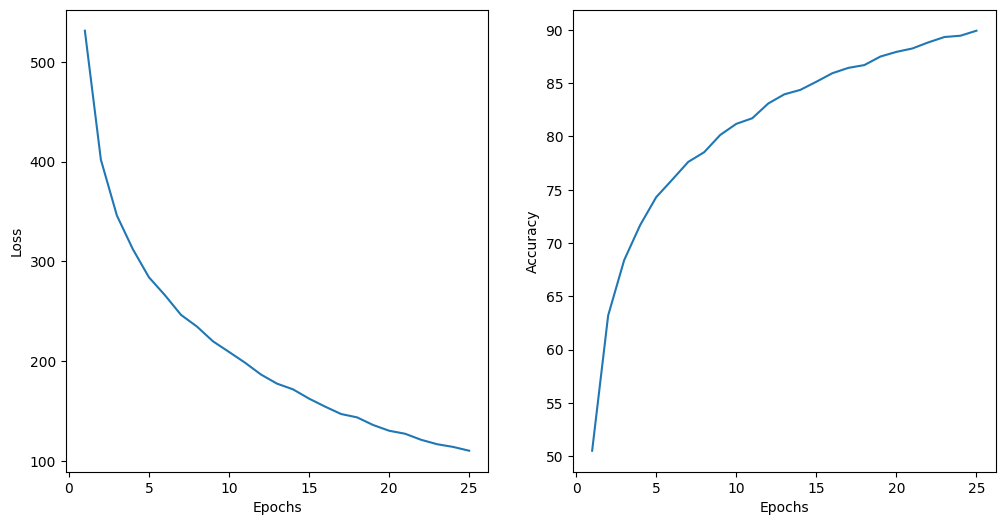

In [ ]:
with torch.no_grad():
    plt.figure(figsize = (12,6))

    plt.subplot(1, 2, 1)
    plt.plot(list(np.arange(epochs) + 1), Loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(list(np.arange(epochs) + 1), Accuracy)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

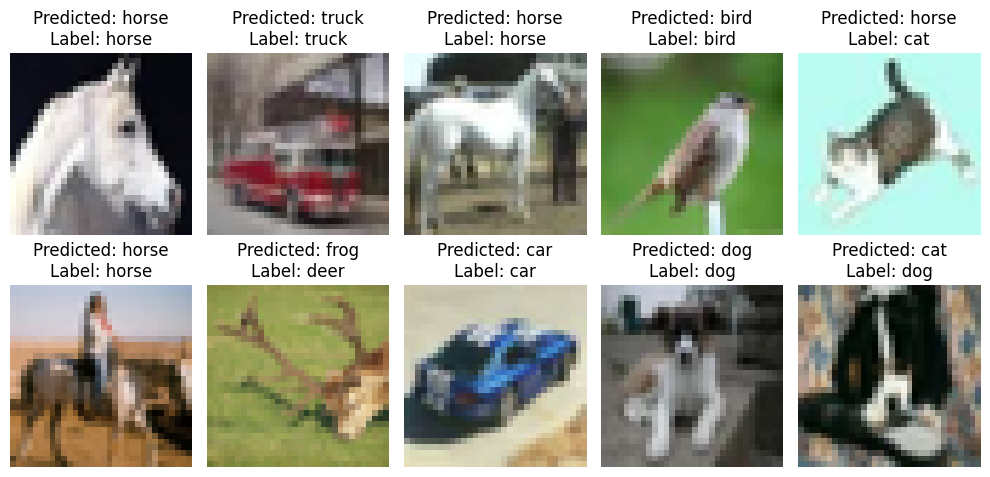

In [ ]:

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


model.eval()

with torch.no_grad():
    idx = torch.randint(0, len(test_dataset), (10,))
    random_subset = Subset(test_dataset, idx.tolist())

    imgs, labels = [], []
    for img, lbl in random_subset:
        imgs.append(img)
        labels.append(lbl)
    imgs = torch.stack(imgs)
    labels = torch.tensor(labels)

    # Predictions
    outputs = model(imgs.to(device))
    preds = torch.argmax(outputs, dim=1)

    # Function to unnormalize
    def unnormalize(img):
        img = img * 0.5 + 0.5
        return img.clamp(0, 1)

    # Plot images with class names
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(unnormalize(imgs[i]).permute(1, 2, 0).cpu())
        plt.title(f"Predicted: {classes[preds[i]]}\nLabel: {classes[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [ ]:
summary(model, input_size = (128, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
CIFARModel                               [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Conv2d: 2-1                       [128, 16, 32, 32]         1,216
│    └─BatchNorm2d: 2-2                  [128, 16, 32, 32]         32
│    └─ReLU: 2-3                         [128, 16, 32, 32]         --
│    └─MaxPool2d: 2-4                    [128, 16, 16, 16]         --
│    └─Dropout: 2-5                      [128, 16, 16, 16]         --
│    └─Conv2d: 2-6                       [128, 48, 16, 16]         19,248
│    └─BatchNorm2d: 2-7                  [128, 48, 16, 16]         96
│    └─ReLU: 2-8                         [128, 48, 16, 16]         --
│    └─MaxPool2d: 2-9                    [128, 48, 8, 8]           --
│    └─Dropout: 2-10                     [128, 48, 8, 8]           --
│    └─Conv2d: 2-11                      [128, 64, 8, 8]           27,712
│   